In [1]:
from model import Model
from PIL import Image

PRO TIP 💡 Replace 'model=.models/yolo/yolov5s.pt' with new 'model=.models/yolo/yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [2]:
# initialize the model
model = Model()

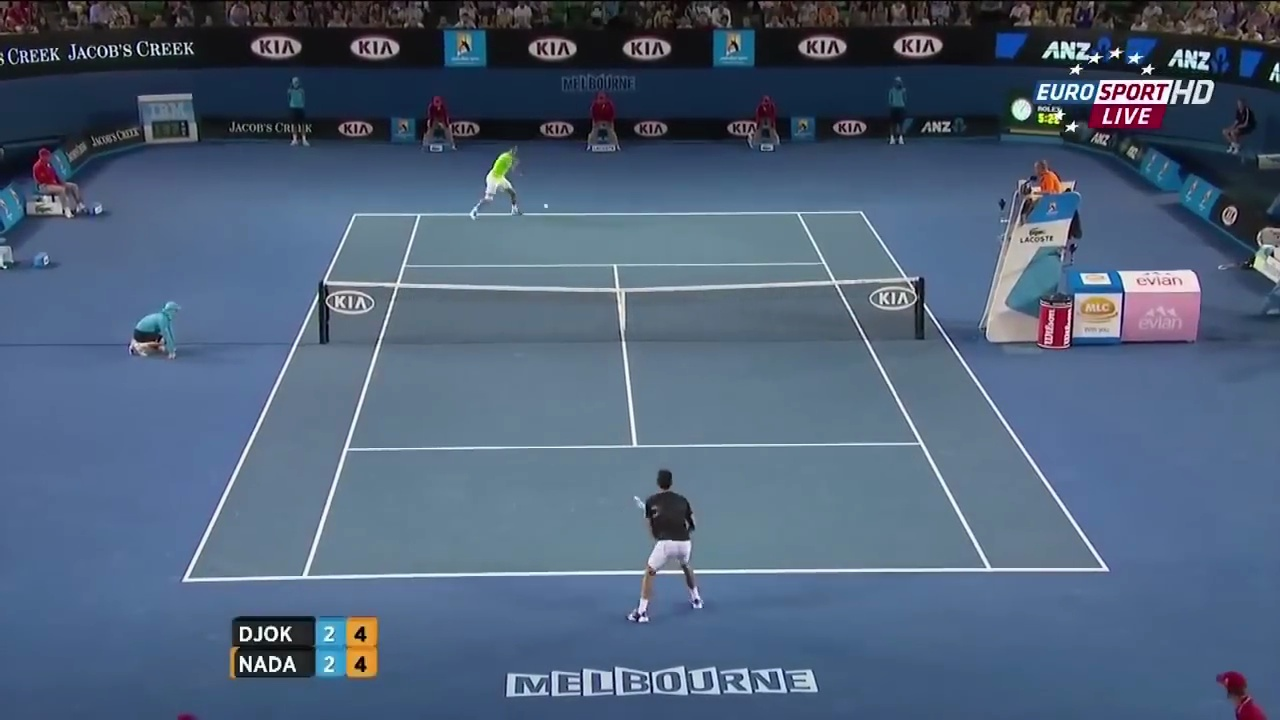

In [3]:
image_path = '/Users/lucijaaleksic/Documents/projects/adl-tennis/frames/frame_2.jpg'
# image_path = '/Users/lucijaaleksic/Documents/projects/adl-tennis/frames/frame_182.jpg'
original = Image.open(image_path)
original

In [4]:
player1, player2 = model.predict(image_path)


image 1/1 /Users/lucijaaleksic/Documents/projects/adl-tennis/frames/frame_2.jpg: 384x640 1 Corners, 514.7ms
Speed: 2.0ms preprocess, 514.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/lucijaaleksic/Documents/projects/adl-tennis/frames/frame_2.jpg: 384x640 11 persons, 1 chair, 121.9ms
Speed: 2.7ms preprocess, 121.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_court(projected_points, projected_player1, projected_player2, ball):
    """
    Visualize a tennis court with keypoints, lines, and net.
    A green background will surround the court by 1m, and a blue rectangle for the tennis court.

    Args:
    - projected_points: A numpy array with the projected keypoints of the court.
                        (expected shape (4, 2) for four corner points).
    """
    # Unpack the projected points for easy access
    projected_keypoint1, projected_keypoint2, projected_keypoint3, projected_keypoint4 = projected_points

    # Calculate the court boundaries (min/max for x and y)
    min_x = min(projected_keypoint1[0], projected_keypoint2[0],
                projected_keypoint3[0], projected_keypoint4[0])
    max_x = max(projected_keypoint1[0], projected_keypoint2[0],
                projected_keypoint3[0], projected_keypoint4[0])
    min_y = min(projected_keypoint1[1], projected_keypoint2[1],
                projected_keypoint3[1], projected_keypoint4[1])
    max_y = max(projected_keypoint1[1], projected_keypoint2[1],
                projected_keypoint3[1], projected_keypoint4[1])

    # Court dimensions
    court_width = 10.97  # Court width in meters
    court_length = 23.78  # Court length in meters
    margin = 3.0         # 1 meter margin around the court

    # Tennis lines based on actual dimensions from the image
    # Service box lengths
    service_box_length = 0.25 * court_length

    # Center service line (length between service boxes)
    center_service_line = court_width / 2.0

    # Net position (middle of the court length)
    net_position = court_length / 2.0

    # Plot the court visualization
    fig, ax = plt.subplots()

    # Plot background in colour (69, 177, 255) with 2m margin
    ax.add_patch(plt.Rectangle((min_x - 2*margin, min_y - 2*margin),
                               max_x - min_x + 4*margin, max_y - min_y + 4*margin,
                               color=(69/255, 177/255, 255/255), alpha=0.5, label='Background'))

    # Plot blue tennis court in colour #156082
    ax.add_patch(plt.Polygon([projected_keypoint1, projected_keypoint2, projected_keypoint3, projected_keypoint4],
                             color='#156082', alpha=0.5, label='Tennis Court'))

    # Plot the net (wide gray line in the middle)
    ax.plot([-1, court_width + 1], [net_position, net_position],
            color='white', linewidth=3, label='Net')

    # Plot the service lines (dashed white lines)
    ax.plot([0, court_width], [service_box_length, service_box_length],
            color='white', label='Service Line')
    
    ax.plot([0, court_width], [court_length - service_box_length, court_length - service_box_length],
        color='white', label='Service Line')
    
        # Plot the center service line  
    ax.plot([center_service_line, center_service_line], [service_box_length, court_length - service_box_length], color='white', label='Center Service Line')

    # plot outline of the court
    ax.plot([0, 0], [0, court_length], color='white', label='Court Outline')
    ax.plot([0, court_width], [0, 0], color='white', label='Court Outline')
    ax.plot([court_width, court_width], [0, court_length], color='white', label='Court Outline')
    ax.plot([0, court_width], [court_length, court_length], color='white', label='Court Outline')

    # plot the players
    projected_player1[1] = court_length - projected_player1[1]
    ax.scatter(projected_player1[0], projected_player1[1], color='red', label='Player 1')

    # reverse coordinates
    projected_player2[1] = court_length - projected_player2[1]
    ax.scatter(projected_player2[0], projected_player2[1], color='blue', label='Player 2')

    # plot the ball
    ax.scatter(ball[0], ball[1], color='yellow', label='Ball')

    # Label and plot details
    ax.set_title("Tennis Court Visualization with Net and Lines")
    ax.set_xlabel("Court Width (meters)")
    ax.set_ylabel("Court Length (meters)")

    # Set axis limits with some margin
    ax.set_xlim(min_x - margin - 1, max_x + margin + 1)
    ax.set_ylim(min_y - margin - 1, max_y + margin + 1)

    # Equal aspect ratio
    ax.set_aspect('equal')

    # legend off
    ax.legend().set_visible(False)

    # Show the plot
    plt.show()

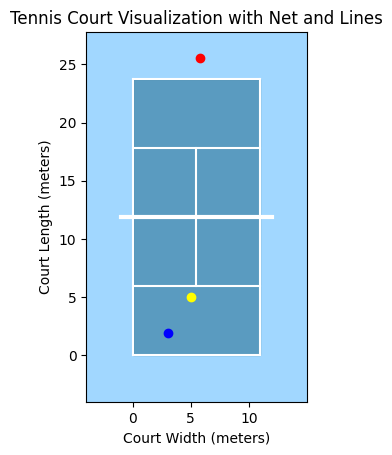

In [7]:
## Court dimensions in meters
court_keypoint1 = (0, 23.78) # Top left corner
court_keypoint2 = (10.97, 23.78) # Top right corner
court_keypoint3 = (10.97, 0) # Bottom right corner
court_keypoint4 = (0, 0) # Bottom left corner
court_pts = np.array([court_keypoint1, court_keypoint2, court_keypoint3, court_keypoint4])

visualize_court(court_pts, player1, player2, (5, 5)) # rotate the court

## Yolo for ball detection

In [21]:
# names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
from ultralytics import YOLO

model = YOLO('models/yolo/yolov8n.pt')
img = Image.open(image_path)

ball_results = model(img)


0: 384x640 11 persons, 1 traffic light, 53.8ms
Speed: 3.2ms preprocess, 53.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [22]:
ball_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [28]:
# Take only results with label 32 (sports ball)
ball_results[0].boxes.cls

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 0.])

There is no class *32* (sports ball) :(